In [76]:
## 1. remove trash
!rm -rf ~/.local/share/Trash/files/*

## 2. load useful functions
import requests
exec(requests.get('http://miruetoto.github.io/my_code/dataHandling.py').text)

## 3. for R user
%load_ext rpy2.ipython
%R library(devtools)

## 4. plt
import matplotlib as mpl 
import matplotlib.pyplot as plt 
Ipython_default=plt.rcParams.copy() # save initial value 
from matplotlib import cycler
plt.rc('figure',dpi=150) # default value 4 figure.dpi is 72.0 
# plt.rcParams.update(Ipython_default) # load initial value 

## 5. Check GPU
# from keras import backend as K
# print('GPU check 4 Keras: '+ str(K.tensorflow_backend._get_available_gpus()))
# import torch
# print('GPU check 4 Pytorch: '+ str(torch.cuda.get_device_name(0)))

## 6. Project Setting
#exec(requests.get('http://miruetoto.github.io/my_code/RF/RF.py').text)
#%R source_url('http://miruetoto.github.io/my_code/RF/RF.r')

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [3]:
### R에 설치된 패키지를 로드하는 방법
import rpy2.robjects.packages as rpkg
from rpy2.robjects.packages import importr as library

In [4]:
gplt=library('ggplot2')

In [5]:
from rpy2.robjects.lib import grdevices
from IPython.display import Image,display
graphics = library('graphics')

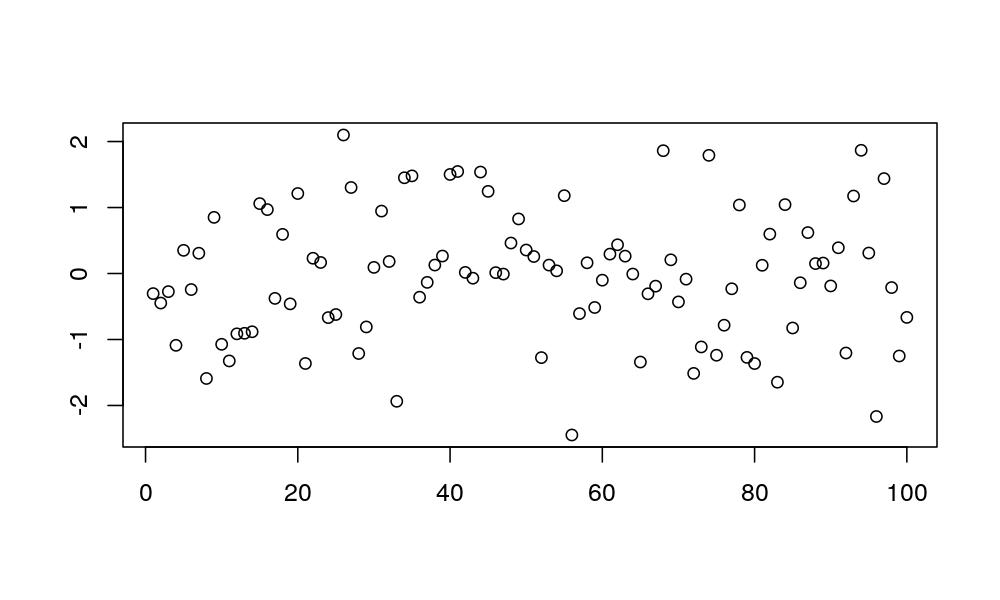

In [6]:
with grdevices.render_to_bytesio(grdevices.jpeg,width=1000,height=600,res=150) as img:
    ro.r.plot(p2r(cc(1,100)),ro.r.rnorm(100),xlab="",ylab="")
display(Image(data=img.getvalue(),format='jpeg',embed=True))

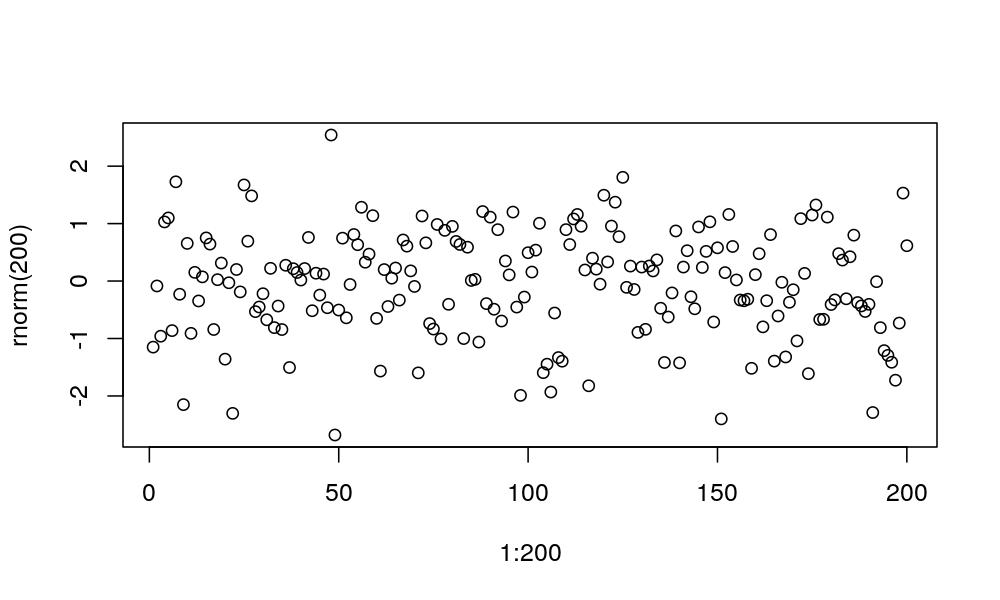

In [7]:
with grdevices.render_to_bytesio(grdevices.jpeg,width=1000,height=600,res=150) as img:
    ro.r("plot(1:200,rnorm(200))")
display(Image(data=img.getvalue(),format='jpeg',embed=True))

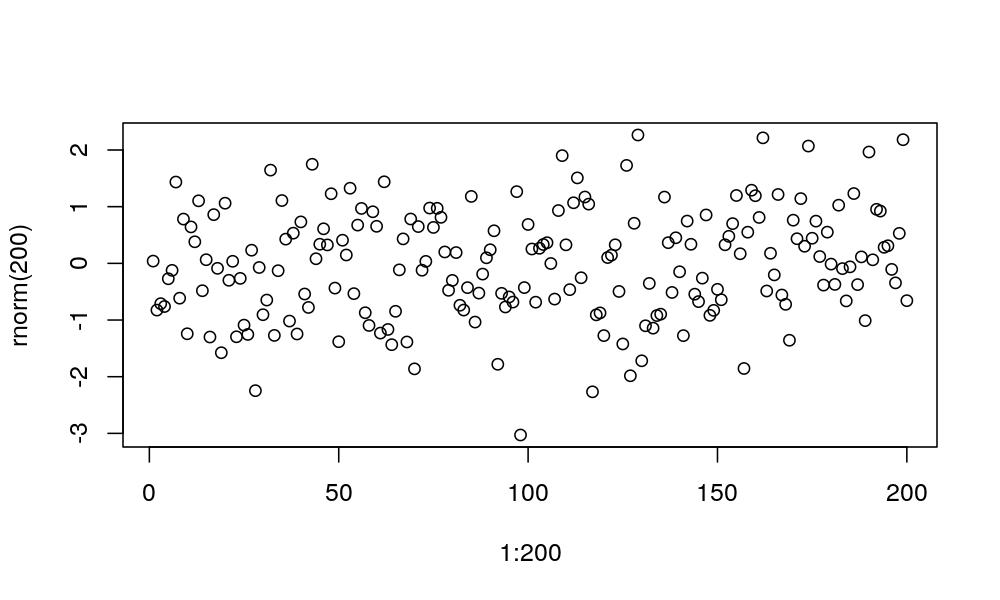

In [8]:
with grdevices.render_to_bytesio(grdevices.jpeg,width=1000,height=600,res=150) as img:
    ro.r("plot(1:200,rnorm(200))")
display(Image(data=img.getvalue(),format='jpeg',embed=True))

In [15]:
%R x11()
#plot(1:200,rnorm(200))

In [9]:
%%R 
ggplot(rdf,aes(x=x,y=y))+geom_line()

R[write to console]: Error in ggplot(rdf, aes(x = x, y = y)) : object 'rdf' not found
Calls: <Anonymous> -> <Anonymous> -> withVisible -> ggplot




Error in ggplot(rdf, aes(x = x, y = y)) : object 'rdf' not found
Calls: <Anonymous> -> <Anonymous> -> withVisible -> ggplot


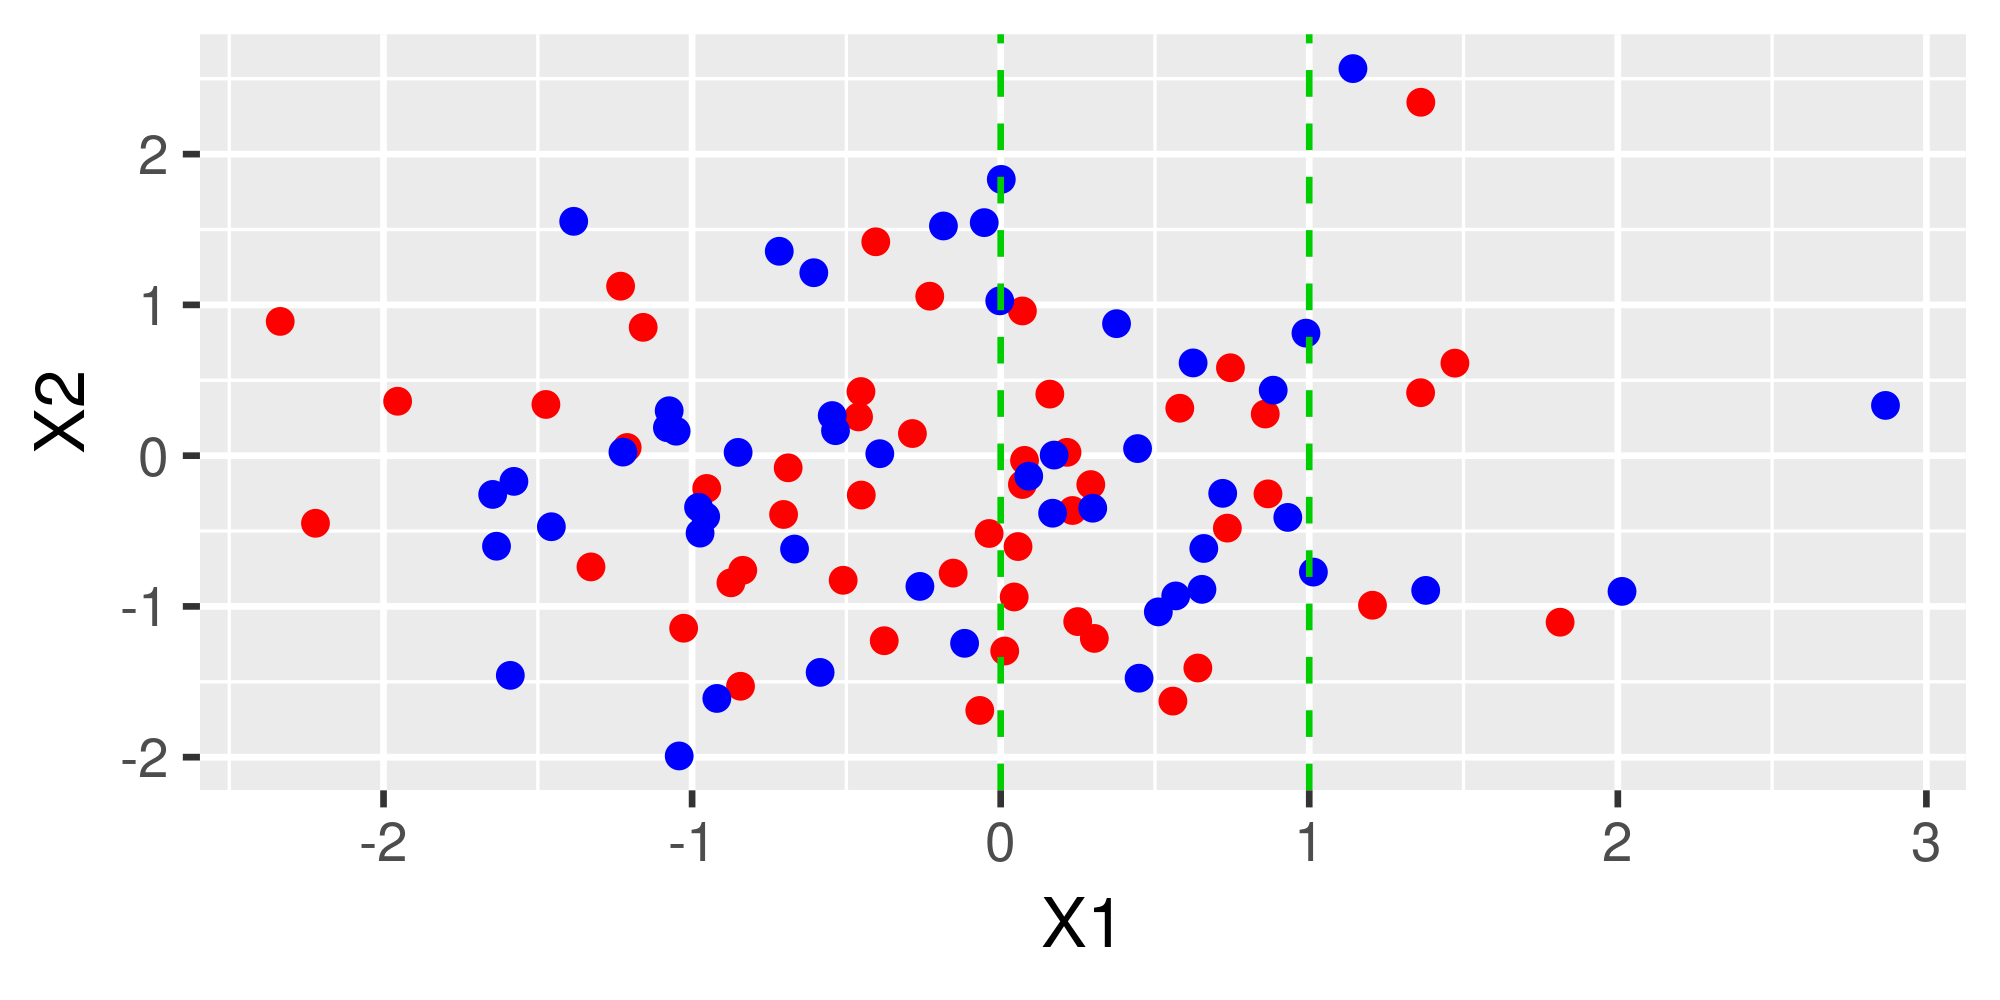

In [100]:
ro.r('library(ggplot2)')
dataf=initpd('n',n=100,p=2)
import rpy2.robjects.lib.ggplot2 as gg

def ggshow(gg, w=1,h=1,r=1):
    with grdevices.render_to_bytesio(grdevices.png,
                                     type="cairo-png",
                                     width=2000*w,
                                     height=1000*h,
                                     res=450*r,
                                     antialias="subpixel") as b:
        ro.r("print")(gg)
    data = b.getvalue()
    ip_img = Image(data=data, format='png', embed=True)
    return ip_img

def ggplot(data):
    if type(data) is rpy2.robjects.vectors.DataFrame:
        rtn=gg.ggplot(data)
    else: 
        rtn=gg.ggplot(p2r(pd.DataFrame(data)))
    return rtn

gg.plt=ggplot
gg.show=ggshow

p = gg.plt(dataf)+\
    gg.aes(x='X1',y='X2') +\
    gg.geom_point(col=[2]*50+[4]*50)+\
    gg.geom_vline(xintercept=p2r([0,1]),col=3,lty=2)
    

gg.show(p)

In [11]:
%%R 
dev.off()
X11()
ggplot(dataf,aes(x=X1,y=X2))+geom_point()
#ggsave("p.png")

R[write to console]: Error in ggplot(dataf, aes(x = X1, y = X2)) : object 'dataf' not found
Calls: <Anonymous> -> <Anonymous> -> withVisible -> ggplot




Error in ggplot(dataf, aes(x = X1, y = X2)) : object 'dataf' not found
Calls: <Anonymous> -> <Anonymous> -> withVisible -> ggplot


In [ ]:
import os
os.remove("p.png")

In [7]:
def rlike():
    lines = []
    while True:
        line = input()
        if line:
            lines.append(line)
        else:
            break
    text = '\n'.join(lines)
    r(text)